In [1]:
# import library
from astroquery.gaia import Gaia
import matplotlib.pyplot as plt
import numpy as np

Let's write a query to get the first 100000 objects from Gaia DR3 source table 

see details of the Gaia DR3 source at: https://gea.esac.esa.int/archive/documentation/GEDR3/Gaia_archive/chap_datamodel/sec_dm_main_tables/ssec_dm_gaia_source.html

Objects should meet the following requirements

- parallax_over_error > 10 
- phot_g_mean_mag < 17 
- RA between 30 and 40
- Dec between -50 and -40

In [2]:
# Now construct the query
query_text = query_text = '''SELECT TOP 100000 ra, dec, parallax, phot_g_mean_mag, phot_bp_mean_mag, phot_rp_mean_mag
FROM gaiadr3.gaia_source
WHERE parallax_over_error > 10 AND
    phot_g_mean_mag < 18 AND
    ra between 30 and 40 AND
    dec between -50 and -40
'''

In [3]:
# run the query through astroquery to get a table
job = Gaia.launch_job(query_text)
gaia_data = job.get_results()


In [4]:
# Let's take a look at the table.
gaia_data

ra,dec,parallax,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag
deg,deg,mas,mag,mag,mag
float64,float64,float64,float32,float32,float32
30.000191393832694,-42.020237740625674,0.8900090041971976,15.55838,15.867054,15.077479
30.000673229142354,-44.96273890535708,3.8093660665773954,16.497208,17.786009,15.372578
30.000874616482598,-46.19972989284243,3.300230226684432,17.461573,18.048933,15.466873
30.000885518439187,-46.596283177462,1.3342348164884534,16.018457,16.587723,15.305245
30.00097787942441,-45.79694631141262,1.5673174428060483,13.123146,13.467046,12.61601
30.000982175655686,-45.205189284152425,1.644122600776919,17.328535,18.41251,16.309496
30.00106847345495,-46.19962579893333,3.290740581869246,17.256174,17.998478,15.458615
30.00139140590847,-49.81548958897508,3.3805589466286503,16.007906,17.12484,14.9569435


Text(0, 0.5, '$M_G$')

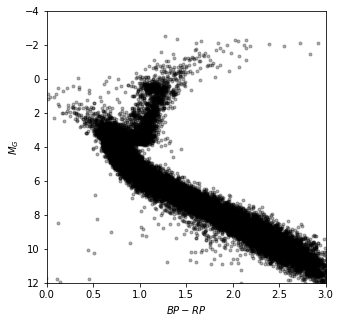

In [5]:
# now let's get the distance module to the stars from parallax
distance = 1./gaia_data['parallax']  # get distance in kpc from parallax in mas/yr
distance_module = 5*np.log10(distance*1000)-5 # get distance module from distance in kpc

# now let's make a HR diagram for these stars.
plt.figure(figsize=[5,5])
plt.plot(gaia_data['phot_bp_mean_mag']-gaia_data['phot_rp_mean_mag'], gaia_data['phot_g_mean_mag']-distance_module,'.k', alpha=0.3)
plt.xlim(0,3)
plt.ylim(12,-4)
plt.xlabel('$BP-RP$')
plt.ylabel('$M_G$')